In [42]:
import sync_wandb_run
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import utils as pu


In [43]:
entity = "raphaelmaser"  # Your W&B username or team
project = "Improved-Interpretability-and-Concepts"  # Your W&B project name
df = sync_wandb_run.load_wandb_runs()
df.count()  # Display the number of runs loaded
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

val_accuracy = "Validation Accuracy"
grid_score = "PG Score"
frozen_layers = "config_define_frozen_layers"
trainable_params = "Trainable Parameters"
figsize=(10,4)


In [44]:
def rename_model_names(df):
    """Rename model names in the DataFrame for better readability."""
    df = df.replace({
        "Model": {
            "B=1_pretrained_CE_bcosified": "B=2 (Bcosified Model)",
            "B=1_pretrained_CE-parallel-adapters-B=2_B=2": "B=2 Model with B=2 Adapter",
            "B=1_pretrained_CE-parallel-residual-adapters-B=2_B=2": "B=2 Model with B=2 Adapter"
        }
    })
    return df

In [45]:
vit_base = df[df['id'] == "2fupnc3h"] # Base model
vit_base["config_lora_initialization_mode"] = "Bcosification Baseline"  # Add a new column for initialization mode
lora_relu = df[df['id'] == "f96i2dw8"]  # LoRA with ReLU activation
lora_relu["config_lora_initialization_mode"] = "standard"
lora_relu_normal = df[df['id'] == "nl49a4hs"]  # LoRA with ReLU activation
lora_relu_normal["config_lora_initialization_mode"] = "normal-distributed"
lora_relu_kaiming = df[df['id'] == "6ebvvz88"]  # LoRA with ReLU activation
lora_relu_xavier = df[df['id'] == "741663zp"]  # LoRA with ReLU activation
lora = pd.concat([vit_base, lora_relu, lora_relu_kaiming, lora_relu_normal, lora_relu_xavier], ignore_index=True)  # Add the Bcosified model to the DataFrame
# conv_wo_batchnorm = conv_wo_batchnorm[conv_wo_batchnorm["id"].isin(["sbpfkwct", "dv8y7o8k", "yheexwdv", "zf9oo2l6", "xka2n8rp"])]  # Filter for specific runs
# conv_wo_batchnorm = rename(conv_wo_batchnorm)  # Rename model names for better readability
lora.reset_index(drop=True, inplace=True)  # Reset index after filtering
print(f"Number of runs in layerwise_freezing group: {len(lora)}")

#Renaming
lora = pu.rename(lora).sort_values(by=val_accuracy, ascending=False)
lora = rename_model_names(lora)  # Rename model names for better readability
# conv_adapter = pu.add_trainable_layers_column(conv_adapter, frozen_layers_col=frozen_layers, new_col_name=trainable_layers)
lora = pu.rename_adapter_factor_experiments(lora)  # Rename columns for adapter factor experiments
lora.rename(columns={
    "config_lora_initialization_mode": "Initialization Mode",
}, inplace=True)
# Some stats
for name in lora["Model"].unique(): print(name)  # Print each model name
display(lora)


Number of runs in layerwise_freezing group: 5
vit_b_16_B=2_pretrained
vit_b_16_b2_pretrained_lora_relu_xavier
vit_b_16_B=2_pretrained_lora_relu_kaiming
vit_b_16_B=2_pretrained_lora_relu
vit_b_16_B=2_pretrained_lora_relu_normal


/tmp/ipykernel_2727281/1593939057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vit_base["config_lora_initialization_mode"] = "Bcosification Baseline"  # Add a new column for initialization mode
/tmp/ipykernel_2727281/1593939057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lora_relu["config_lora_initialization_mode"] = "standard"
/tmp/ipykernel_2727281/1593939057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

id                                      Model     state  \
0  2fupnc3h                    vit_b_16_B=2_pretrained  finished   
4  741663zp    vit_b_16_b2_pretrained_lora_relu_xavier  finished   
2  6ebvvz88  vit_b_16_B=2_pretrained_lora_relu_kaiming  finished   
1  f96i2dw8          vit_b_16_B=2_pretrained_lora_relu  finished   
3  nl49a4hs   vit_b_16_B=2_pretrained_lora_relu_normal    failed   

         entity                                 project            created_at  \
0  raphaelmaser  Improved-Interpretability-and-Concepts  2025-07-19T06:48:52Z   
4  raphaelmaser  Improved-Interpretability-and-Concepts  2025-07-17T16:01:22Z   
2  raphaelmaser  Improved-Interpretability-and-Concepts  2025-07-17T16:03:41Z   
1  raphaelmaser  Improved-Interpretability-and-Concepts  2025-07-16T16:14:29Z   
3  raphaelmaser  Improved-Interpretability-and-Concepts  2025-07-17T14:18:39Z   

   updated_at tags notes                                                url  \
0         NaN  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
4         NaN  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
2         NaN  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
1         NaN  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
3         NaN  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   

      group  job_type  sweep                   synced_at  \
0  vit-base       NaN    NaN  2025-07-22T13:22:10.919917   
4  vit-lora       NaN    NaN  2025-07-22T13:22:00.505202   
2  vit-lora       NaN    NaN  2025-07-22T13:22:02.216211   
1  vit-lora       NaN    NaN  2025-07-22T13:21:21.494122   
3  vit-lora       NaN    NaN  2025-07-22T13:21:53.243688   

   final_trainer/global_step  final_MulticlassAccuracy_train  \
0                   202099.0                        0.924415   
4                   202099.0                        0.865885   
2                   202099.0                        0.846286   
1                   202099.0                        0.206817   
3                    38398.0                        0.012451   

   final_high_confidence_samples  \
0                            NaN   
4                            NaN   
2                            NaN   
1                            NaN   
3                            NaN   

   final_MulticlassAccuracy_val/dataloader_idx_0  \
0                                            NaN   
4                                            NaN   
2                                            NaN   
1                                            NaN   
3                                            NaN   

   final_val_contribution_score/dataloader_idx_0  final_train_time  \
0                                            NaN        148.816925   
4                                            NaN        158.575317   
2                                            NaN        170.784424   
1                                            NaN        163.689667   
3                                            NaN        178.717300   

   final_val_pg_score/dataloader_idx_1  final_train_loss  \
0                                  NaN          0.033399   
4                                  NaN          0.034895   
2                                  NaN          0.035418   
1                                  NaN          0.050974   
3                                  NaN          0.055656   

   final_epoch_total_time  final_val_loss/dataloader_idx_0  final_epoch  \
0              170.816956                              NaN         99.0   
4              180.419647                              NaN         99.0   
2              200.142883                              NaN         99.0   
1              172.623642                              NaN         99.0   
3              187.215836                              NaN         18.0   

   config_b  config_lr config_loss  config_seed config_tags config_group  \
0       2.0      0.001  UniformBCE         42.0      

<Figure size 640x480 with 0 Axes>

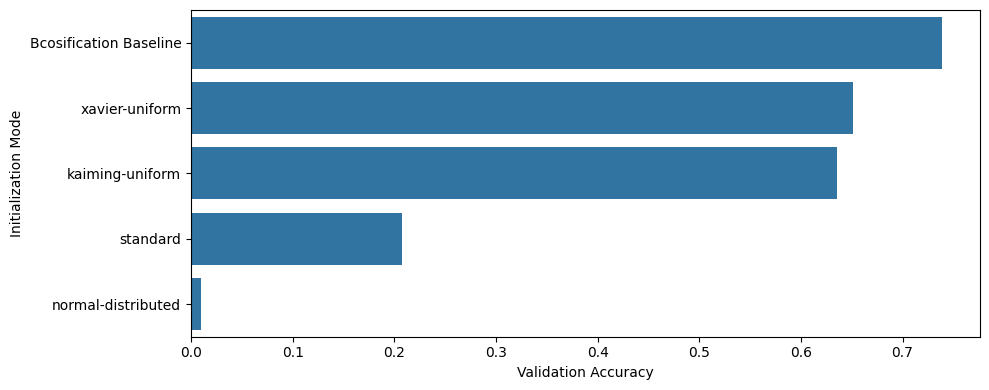

In [46]:
# Move legend outside the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=figsize)
ax = sns.barplot(
    data=lora,
    x=val_accuracy,
    y="Initialization Mode",
    # hue="Model",  # Color points by name
    # s=100  # Make points larger
)
#pu.add_val_to_plot(ax)
# plt.ylim(0.2, 0.90)
# Move legend outside the plot
plt.tight_layout()
plt.show()